In [ ]:
#Store Sales Prediction
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#importing dataset from drive
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('drive/My Drive/Projects/Stores.csv')
data.head()

Mounted at /content/drive


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
data.info()    #data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [ ]:
data.isna().sum()  #no null values

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

Data visualization

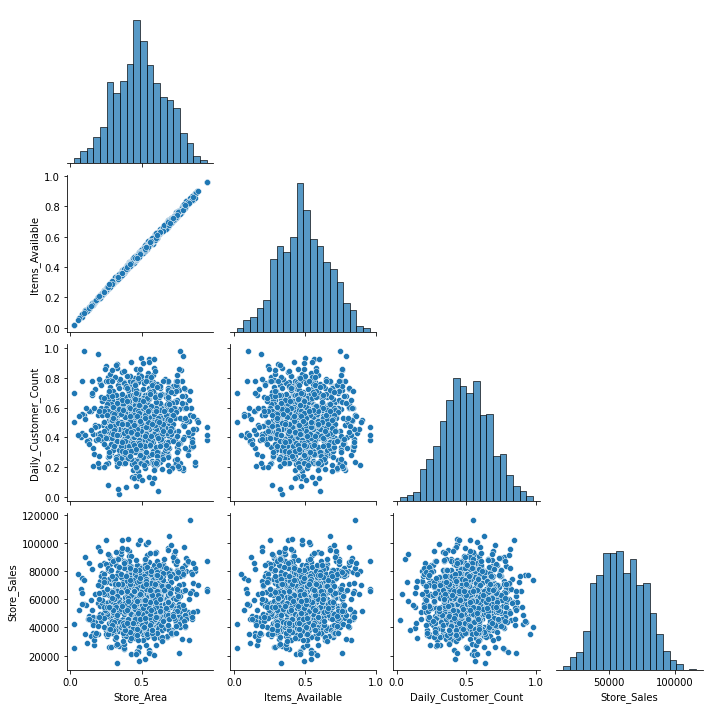

In [ ]:
sns.pairplot(data,corner=True)

In [ ]:
data=data.drop('Store ID ', axis=1)
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


Correlation

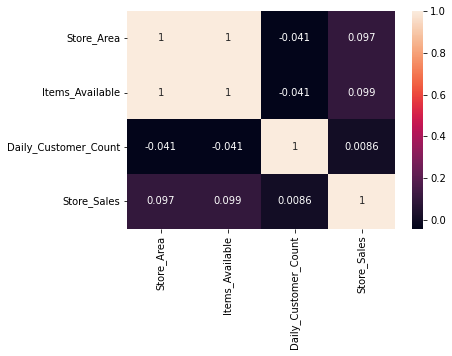

In [ ]:
sns.heatmap(data.corr(),annot=True)

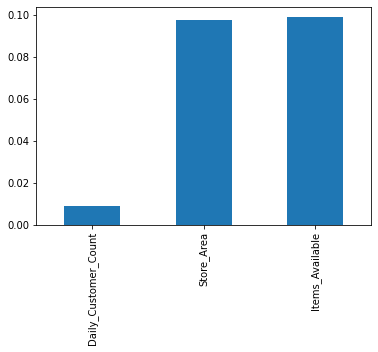

In [ ]:
data.corr()['Store_Sales'].sort_values()[:-1].plot(kind='bar')

Selecting independent and dependent variables.

In [ ]:
x=data.drop('Store_Sales',axis=1)
y=data['Store_Sales']

Normalization

In [ ]:
for i in x.columns:
    x[i]=(x[i]-x[i].min())/(x[i].max()-x[i].min())
data=pd.concat([x,y],axis=1)  

In [ ]:
data.info() #Normalized data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Store_Area            896 non-null    float64
 1   Items_Available       896 non-null    float64
 2   Daily_Customer_Count  896 non-null    float64
 3   Store_Sales           896 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 28.1 KB


Checking the Outliers

In [ ]:
def detect_outlier(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    lower_bound = q1 - (1.5 * (q3-q1))
    upper_bound = q3 + (1.5 * (q3-q1))

    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

print(detect_outlier((data['Store_Area'])))
print(detect_outlier((data['Items_Available'])))

print(detect_outlier((data['Daily_Customer_Count'])))

#There are outliers in all independent variables.

[0.9587345254470426, 0.0, 1.0, 0.9896836313617606, 0.0034387895460797797]
[0.9711815561959655, 0.0, 1.0, 0.9884726224783862, 0.01095100864553314]
[0.0, 0.9806451612903225, 1.0]


Visualising Outliers:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


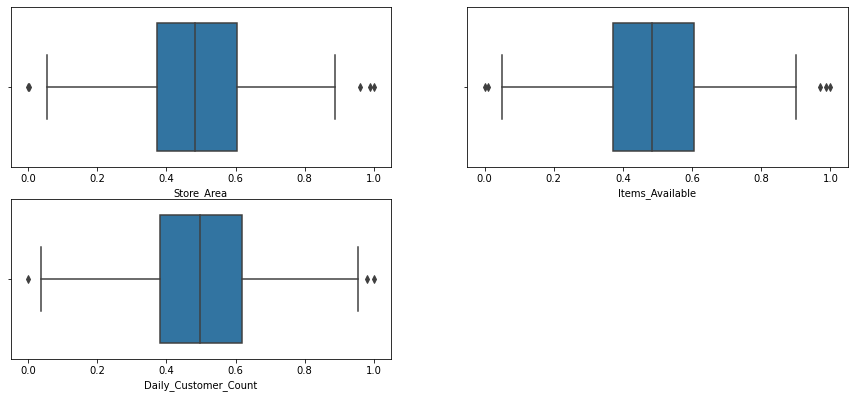

In [ ]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["Store_Area","Items_Available","Daily_Customer_Count"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(data[i]);
            plt.xlabel(i);

Fixing the Outliers

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Store_Area            896 non-null    float64
 1   Items_Available       896 non-null    float64
 2   Daily_Customer_Count  896 non-null    float64
 3   Store_Sales           896 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 28.1 KB


In [ ]:
def treat_outliers():
    l = ["Store_Area","Items_Available","Daily_Customer_Count"]
    for i in l:
        x = np.quantile(data[i],[0,0.25,0.50,0.75])
        iqr = x[3]-x[1]
        upper_whisker = x[3]+1.5*iqr
        lower_whisker = x[1]-1.5*iqr
        data[i] = np.where(data[i]>upper_whisker,upper_whisker,(np.where(data[i]<lower_whisker,lower_whisker,data[i])))
treat_outliers()

Outliers are treated.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


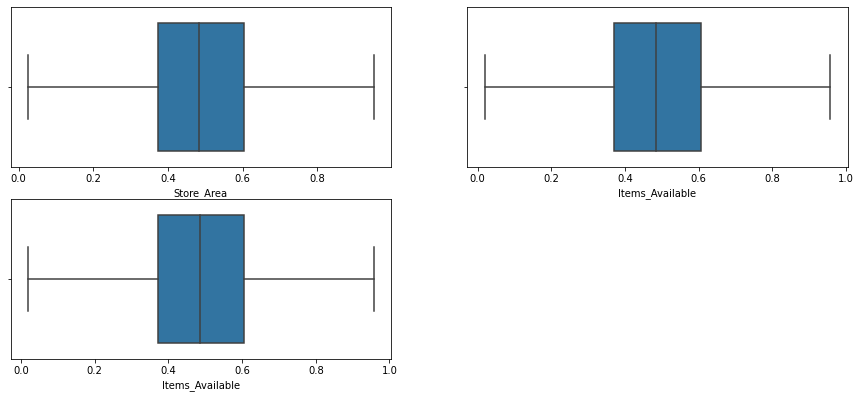

In [ ]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["Store_Area","Items_Available","Items_Available"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(data[i]);
            plt.xlabel(i);

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Store_Area            896 non-null    float64
 1   Items_Available       896 non-null    float64
 2   Daily_Customer_Count  896 non-null    float64
 3   Store_Sales           896 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 28.1 KB


Splitting dataset into training and testing data

In [ ]:
a = data.drop(columns = ["Store_Sales"])
b = data["Store_Sales"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(a, b, test_size= 0.20, random_state=101)

Scaling of indipendent data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# ***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)  #model fitting on training data

LinearRegression()

Prediction

In [ ]:
predict_train=lr.predict(x_train)
predict_test=lr.predict(x_test)

Accuracy

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_test=mean_squared_error(y_test,predict_test)
print(f"RMSE of train dataset is {rmse_test}")

from sklearn.metrics import r2_score
print(f"r2_score of train dataset is {r2_score(y_test,predict_test)}")

RMSE of train dataset is 294178120.4180181
r2_score of train dataset is 0.003623027698379744


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predict_test)

14137.30483214507

In [ ]:
np.sqrt(mean_squared_error(y_test,predict_test))

17151.62150987533

In [ ]:
data['Store_Sales'].describe()

count       896.000000
mean      59351.305804
std       17190.741895
min       14920.000000
25%       46530.000000
50%       58605.000000
75%       71872.500000
max      116320.000000
Name: Store_Sales, dtype: float64

# ***Polynomial Regression***

In [ ]:
x=data.drop('Store_Sales',axis=1)
y=data['Store_Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

Scaling

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Polynomial Featuring

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter=PolynomialFeatures(degree=2,include_bias=False)
poly_features=poly_converter.fit_transform(x)

Respliting data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)

In [ ]:
poly_model=LinearRegression()
poly_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=poly_model.predict(x_test)

Accuracy

In [ ]:
mean_absolute_error(y_test,y_pred)

14276.142182644706

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))
#No much difference in accuracy compared to Linear Regression
#Lets try increasing degree of polynomial

17305.935371804204

In [ ]:
for i in range(1,10):
    
    poly_converter=PolynomialFeatures(degree=i,include_bias=False)
    poly_features=poly_converter.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)
    
    poly_model=LinearRegression()
    poly_model.fit(x_train,y_train)
    
    test_preds=poly_model.predict(x_test)
    
    mae_test=mean_absolute_error(y_test,test_preds)
    
    print(f"for {i}th degree mean_absolute_error for testing dataset is {mae_test}")

#There is no significant change in results even at high degree of polynomial

for 1th degree mean_absolute_error for testing dataset is 14137.304832145064
for 2th degree mean_absolute_error for testing dataset is 14276.142182644706
for 3th degree mean_absolute_error for testing dataset is 14449.562446480102
for 4th degree mean_absolute_error for testing dataset is 14839.816433960668
for 5th degree mean_absolute_error for testing dataset is 15158.554322630214
for 6th degree mean_absolute_error for testing dataset is 17283.18298552971
for 7th degree mean_absolute_error for testing dataset is 21616.232953907118
for 8th degree mean_absolute_error for testing dataset is 25634.3329268732
for 9th degree mean_absolute_error for testing dataset is 37113.018626018624


# ***Support Vector Machine***

In [ ]:
x=data.drop('Store_Sales',axis=1)
y=data['Store_Sales']

In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

#scaling
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVR
svr=SVR()

In [ ]:
param_grid={'kernel':['linear','poly','rbf'],
            'gamma':['scale','auto'],
            'degree':[2,3,4],
            'C':[0.001,0.1,1,1.5],
            'epsilon':[0.001,0.1,1,2,5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(svr,param_grid=param_grid,cv=5)

In [ ]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.1, 1, 1.5], 'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.1, 1, 2, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

Prediction

In [ ]:
y_pred=grid_model.predict(x_test)

Accuracy

In [ ]:
mean_absolute_error(y_test,y_pred)

14326.158010873798

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

17183.04787733411

In [ ]:
data['Store_Sales'].describe()  ####Most accuract result is obtained by SVR

count       896.000000
mean      59351.305804
std       17190.741895
min       14920.000000
25%       46530.000000
50%       58605.000000
75%       71872.500000
max      116320.000000
Name: Store_Sales, dtype: float64

# ***Bayesian Linear Regression***

In [ ]:
x=data.drop('Store_Sales',axis=1)
y=data['Store_Sales']

In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

#scaling
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(x_train, y_train)

BayesianRidge()

Prediction

In [ ]:
y_pred=model.predict(x_test)

Accuracy

In [ ]:
mean_absolute_error(y_test,y_pred)

14220.331184965018

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

17149.790614486366

In [ ]:
data['Store_Sales'].describe()

count       896.000000
mean      59351.305804
std       17190.741895
min       14920.000000
25%       46530.000000
50%       58605.000000
75%       71872.500000
max      116320.000000
Name: Store_Sales, dtype: float64

# ***Lasso Regressor***

In [ ]:
x=data.drop('Store_Sales',axis=1)
y=data['Store_Sales']

In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

#scaling
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True)
lasso_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(normalize=True)

Prediction

In [ ]:
y_pred =lasso_reg.predict(x_test)

Accuracy

In [ ]:
mean_absolute_error(y_test,y_pred)

14181.422091821001

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

17157.2114572007

In [ ]:
data['Store_Sales'].describe()

count       896.000000
mean      59351.305804
std       17190.741895
min       14920.000000
25%       46530.000000
50%       58605.000000
75%       71872.500000
max      116320.000000
Name: Store_Sales, dtype: float64